# Samarth's Capstone Final - Oscillators
Samarth Sheth 3034932330 PHYSICS 77 UC Berkeley

The standard harmonic oscillator (Simple Harmonic Oscillator) has an equation that its acceleration is equal to negative angular velocity squared multiplied by displacement $a$ = -$ω_{0}^{2}x$ The damped case has an extra term -2$ζω_{0}v$, where $ζ$ is a parameter which is called the damping ratio of the Oscillator. $ζ$ = $\frac{c}{2\sqrt{mk}}$ - $m$ is the mass of the bob and $k$ is the spring constant. When $ζ$ < 1, we have Under-damping, when $ζ$ = 1 we have Critical Damping, and when $ζ$ > 1 we have Over-damping. When $ζ$ = 0 we have the reduced differential equation which has no damping. To Plot graphs of these different cases from one piece of code, I found it easier to make a class with the basic variables $k,m,c$, and a condition "is damped"? After setting up the constructor class I use the Runge-Kutta 4th Order Method of Solving ODE's. To do this, I split the second order derivative above, into 2 first order coupled derivatives. I can also use the position and velocity data obtained from the RK4 data to calculate the Energy of the oscillator using the formula $Energy$ $=$ $\frac{1}{2}m{v}^2$ $+$ $\frac{1}{2}k{x}^2$. I then have a display function to create a beautiful display and plot the curves of $Energy, X(t), and$       $V(t)$ as well as the Exponential Decay for the Underdamped case which depends on an if function. The equation for that decay is $decay = ±{e}^{-λt}$. Because the plots change, I have to make the titles and legends change too. To do this is use an if function. It also cleverly plots the decay function in only the Underdamped case. In the subsequent cases, the underlying class structure is pretty much the same - the only changes are in the variables in the constructor class, the titles of the class, and ODE's. #Just a General Tip - Due to the size of the plots, when the cells are run the Notebook scrolls down so it can sometimes be confusing. I suggest all cells to be run in order and then the notebook be looked at. 

## Case 1: Undriven
For the first case, the coupled differential equations are 
$\frac{dx}{dt}$ = $y$ and $\frac{dy}{dt}$ = $-$$ω_{0}^{2}x$ $-$ 2$ζω_{0}v$   which stem from the 2nd Order ODE :
$\frac{d^{2}x}{dt^{2}}$ = $-$$ω_{0}^{2}x$ $-$ 2$ζω_{0}\frac{dx}{dt}$
         The Error Analysis done shows that the plots are extremely accurate.

In [2]:
#final
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# Spring Data for the Simple Harmonic Oscillator

# interval and step data
a = 0.0
b = 20.0
N = 1000
h = (b-a)/N


class Oscillator:
    def __init__(self, k, m, c, is_damped):
        # Spring Constant Units are Kg*s**-2 (Kilogram per Second squared)
        self.k = k
        self.m = m  # Mass Units are Kg (Kilogram)
        # Viscous Damping Coefficient Units are Kg/s (Kilogram per Second or (Newton*Second)/Metre)
        self.c = c
        # Undamped_Angular_Frequency_of_the_Oscillator
        self.ω0 = np.sqrt(self.k/m)
        if is_damped:
            self.ζ = self.c/(2*np.sqrt(self.m*self.k))
            self.λ = self.ω0 * self.ζ
        else:
            self.ζ = 0
            self.λ = 0

        self.tpoints = np.arange(a, b, h)
        self.xpoints = []
        self.ypoints = []
        self.r = np.array([1.0, 0.0], dtype=float) #initial conditions
        self.epoints = []
        
    def f(self, r, t):
        x = r[0]
        y = r[1]
        fx = y
        fy = -self.ω0*self.ω0*x - 2*self.ζ*self.ω0*y
        return np.array([fx, fy], dtype=float)

    def rungeKutta4(self):
        for t in self.tpoints:
            x = self.r[0]
            y = self.r[1]
            self.xpoints.append(x)
            self.ypoints.append(y)
            self.epoints.append(0.5 * y * y * self.m + 0.5 * x * x * self.k)
            
            k1 = h*self.f(self.r, t)
            k2 = h*self.f(self.r + 0.5*k1, t + 0.5*h)
            k3 = h*self.f(self.r + 0.5*k2, t + 0.5*h)
            k4 = h*self.f(self.r + k3, t + h)
            self.r += (k1 + 2*k2 + 2*k3 + k4)/6

    def display(self):
        fig = plt.figure(figsize=(25, 18))
        ax = fig.add_subplot(1, 1, 1)
        major_ticks = np.arange(-50, 50, 1)
        minor_ticks = np.arange(-50, 50, 2)
        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)
        plt.grid(color='black', linestyle='-', linewidth=0.3)
        plt.plot(self.tpoints, self.xpoints, "r", label="$X(t)$")
        plt.plot(self.tpoints, self.ypoints, label="$V(t)$")
        plt.plot(self.tpoints, self.epoints, "orange", label = "$Energy(t)$")
        
        if (self.ζ < 1):
            decay = np.exp(-self.λ * self.tpoints)  # Well, in reality it is time
            plt.plot(self.tpoints, decay, "b--", label = "$ ±e^{-λt}$ ")
            ndecay = -1*np.exp(-self.λ * self.tpoints)  # Well, in reality it is time
            plt.plot(self.tpoints, ndecay, "b--")

        plt.legend(fontsize = "25")
        if (self.ζ == 0):
            plt.title("A plot of $X(t)$, $V(t)$, and $Energy(t)$ of an Undamped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
        elif (self.ζ < 1):
            plt.title("A plot of $X(t)$, $V(t)$, and $Energy(t)$ of an Underdamped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
        elif (self.ζ > 1):
            plt.title("A plot of $X(t)$, $V(t)$, and $Energy(t)$ of an Overdamped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)    
        else:
            plt.title(" A plot of $X(t)$, $V(t)$, and $Energy(t)$ of a Critically Damped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4) ", loc='center', fontsize=28)
            
        plt.xlabel("$t$ / $seconds$", fontsize=30)
        plt.ylabel("$X(t)$ / $m$ ,  $V(t)$ / $ms^{-1}$ , $Energy(t)$ / $J$", fontsize=30)
        plt.show()
        
#Some Error Analysis of the Energy Can be done with the undamped case to check energy conservation: 
        print("Max= ", np.max(self.epoints)) 
        print("Min= ", np.min(self.epoints)) 
        #print("Mean= ", np.mean(self.epoints))
        #pint("Standard Deviation= ", np.std(self.epoints))  


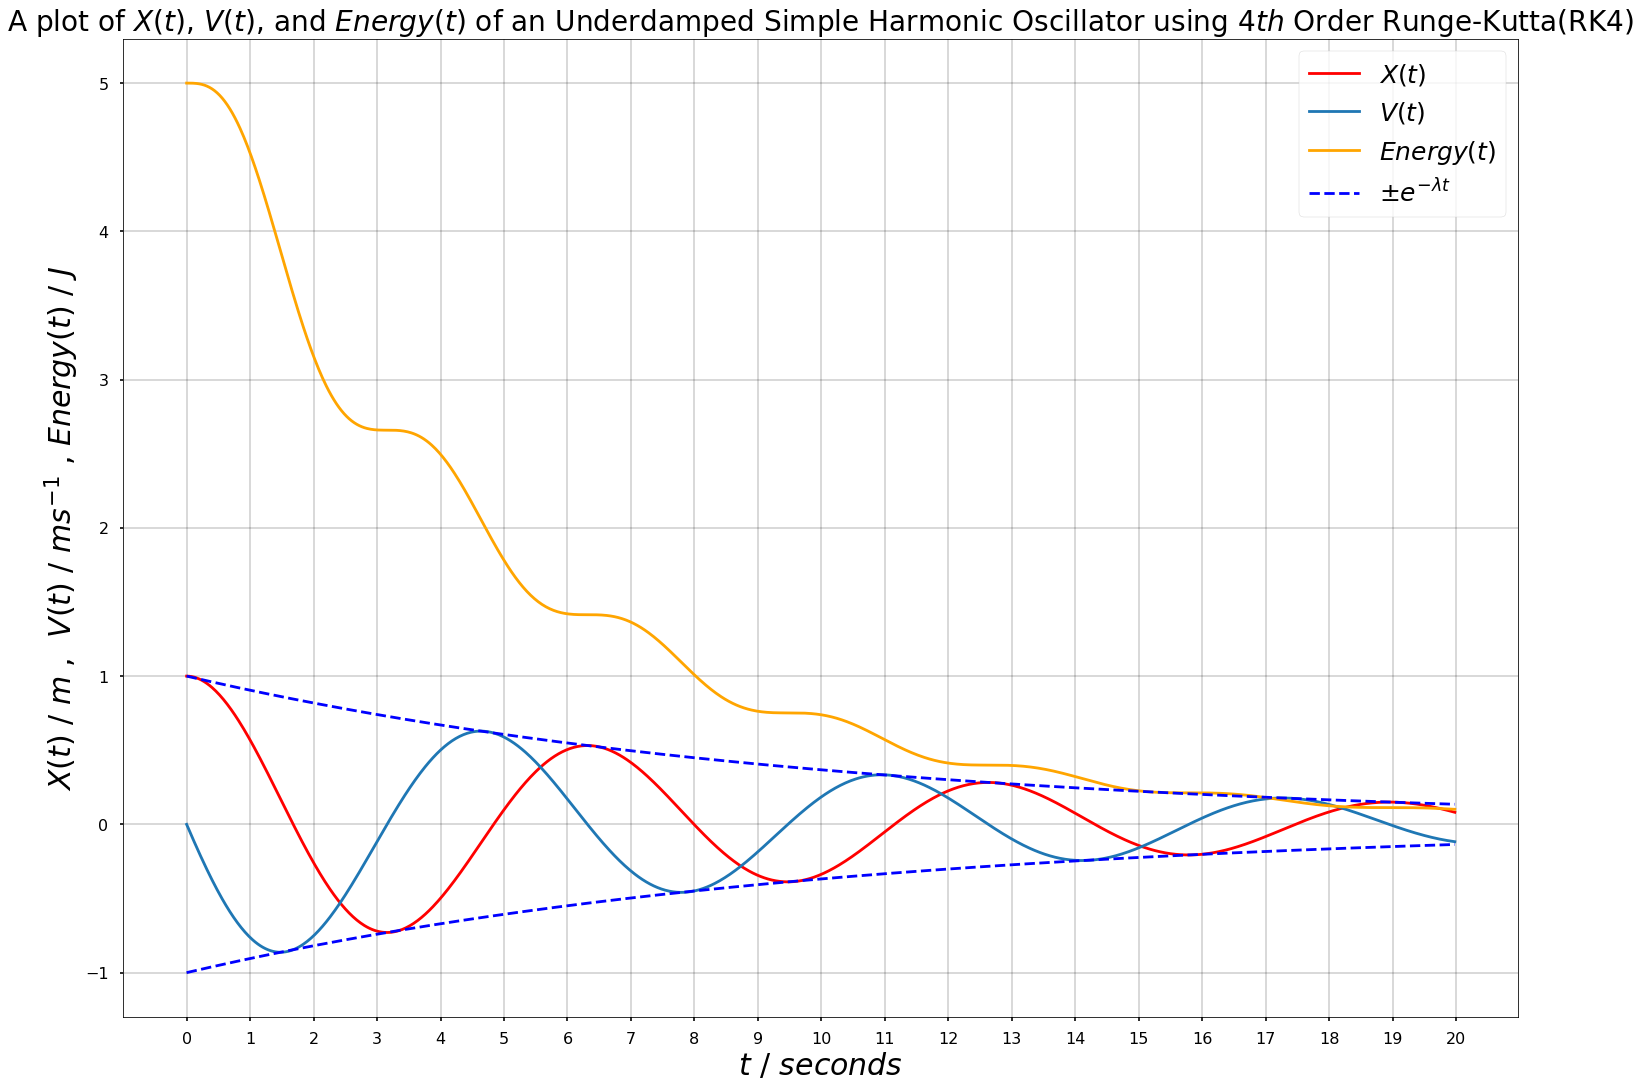

Max=  5.0
Min=  0.10146531462330748


In [8]:
harmonic_oscillator = Oscillator(10.0, 10.0, 2.0, True) #Oscillator(k, m, c, is_damped)
harmonic_oscillator.rungeKutta4()
harmonic_oscillator.display()


## Adding a Sinusoidal Driving Forve
Now we change the class for a Sinusoidal Driving Force.
This is the Damped Driven case. $\frac{dx}{dt}$ = $y$ and $\frac{dy}{dt}$ = $\frac{F_{0}}{m}sin(wt)$ $-$$ω_{0}^{2}x$ $-$ 2$ζω_{0}v$   which stem from the 2nd Order ODE :
$\frac{d^{2}x}{dt^{2}}$ = $-$$ω_{0}^{2}x$ $-$ 2$ζω_{0}\frac{dx}{dt}$ $+$ $\frac{F_{0}}{m}sin(wt)$


In [9]:
#final
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')



# Spring Data for the Simple Harmonic Oscillator

a = 0.0
b = 20.0
N = 10000
h = (b-a)/N


class Oscillator:
    def __init__(self, k, m, c, is_damped, F0, ω):
        # Spring Constant Units are Kg*s**-2 (Kilogram per Second squared)
        self.k = k
        self.m = m  # Mass Units are Kg (Kilogram)
        # Viscous Damping Coefficient Units are Kg/s (Kilogram per Second or (Newton*Second)/Metre)
        self.c = c
        # Undamped_Angular_Frequency_of_the_Oscillator
        self.ω0 = np.sqrt(self.k/m)
        self.F0 = F0
        self.ω = ω
        
        
        if is_damped:
            self.ζ = self.c/(2*np.sqrt(self.m*self.k))
        else:
            self.ζ = 0
            

        self.tpoints = np.arange(a, b, h)
        self.xpoints = []
        self.ypoints = []
        self.r = np.array([1.0, 0.0], dtype=float)
        self.epoints = []
        
    def f(self, r, t):
        x = r[0]
        y = r[1]
        fx = y
        fy = (self.F0/self.m)*np.sin(self.ω*t) -self.ω0*self.ω0*x - 2*self.ζ*self.ω0*y
        return np.array([fx, fy], dtype=float)

    def rungeKutta4(self):
        for t in self.tpoints:
            x = self.r[0]
            y = self.r[1]
            self.xpoints.append(x) #Position
            self.ypoints.append(y) #Velocity
            self.epoints.append(0.5 * y * y * self.m + 0.5 * x * x * self.k) #Energy
            
            k1 = h*self.f(self.r, t)
            k2 = h*self.f(self.r + 0.5*k1, t + 0.5*h)
            k3 = h*self.f(self.r + 0.5*k2, t + 0.5*h)
            k4 = h*self.f(self.r + k3, t + h)
            self.r += (k1 + 2*k2 + 2*k3 + k4)/6

    def display(self):
        fig = plt.figure(figsize=(25, 18))
        ax = fig.add_subplot(1, 1, 1)
       
        major_ticks = np.arange(-50, 50, 1)
        minor_ticks = np.arange(-50, 50, 2)
        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)
        plt.grid(color='black', linestyle='-', linewidth=0.3)

        plt.plot(self.tpoints, self.xpoints, "r", label="$X(t)$")
        plt.plot(self.tpoints, self.ypoints, label="$V(t)$")
        plt.plot(self.tpoints, self.epoints, "orange", label = "$Energy(t)$")
        


        plt.legend( fontsize = "30")
        if (self.ζ == 0):
            plt.title("A plot of $X(t)$, $V(t)$, and $Energy(t)$ of a Sinisoidally Driven Undamped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
        elif (self.ζ < 1):
            plt.title("A plot of $X(t)$, $V(t)$, and $Energy(t)$ of a Sinisoidally Driven Underdamped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
        elif (self.ζ > 1):
            plt.title("A plot of $X(t)$, $V(t)$, and $Energy(t)$ of a Sinisoidally Driven Overdamped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)    
        else:
            plt.title("A plot of $X(t)$, $V(t)$,  and $Energy(t)$ of a Sinisoidally Driven Critically Damped Simple Harmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
            
        plt.xlabel("$t$ / $seconds$", fontsize=30)
        plt.ylabel("$X(t)$ / $m$ ,  $V(t)$ / $ms^{-1}$ , $Energy(t)$ / $J$", fontsize=30)
        plt.show()
        
        #Some Error Analysis of the Energy Can be done: 
        print("Max= ", np.max(self.epoints)) 
        print("Min= ", np.min(self.epoints)) 
        #print("Mean= ", np.mean(self.epoints))
        #pint("Standard Deviation= ", np.std(self.epoints))  
        


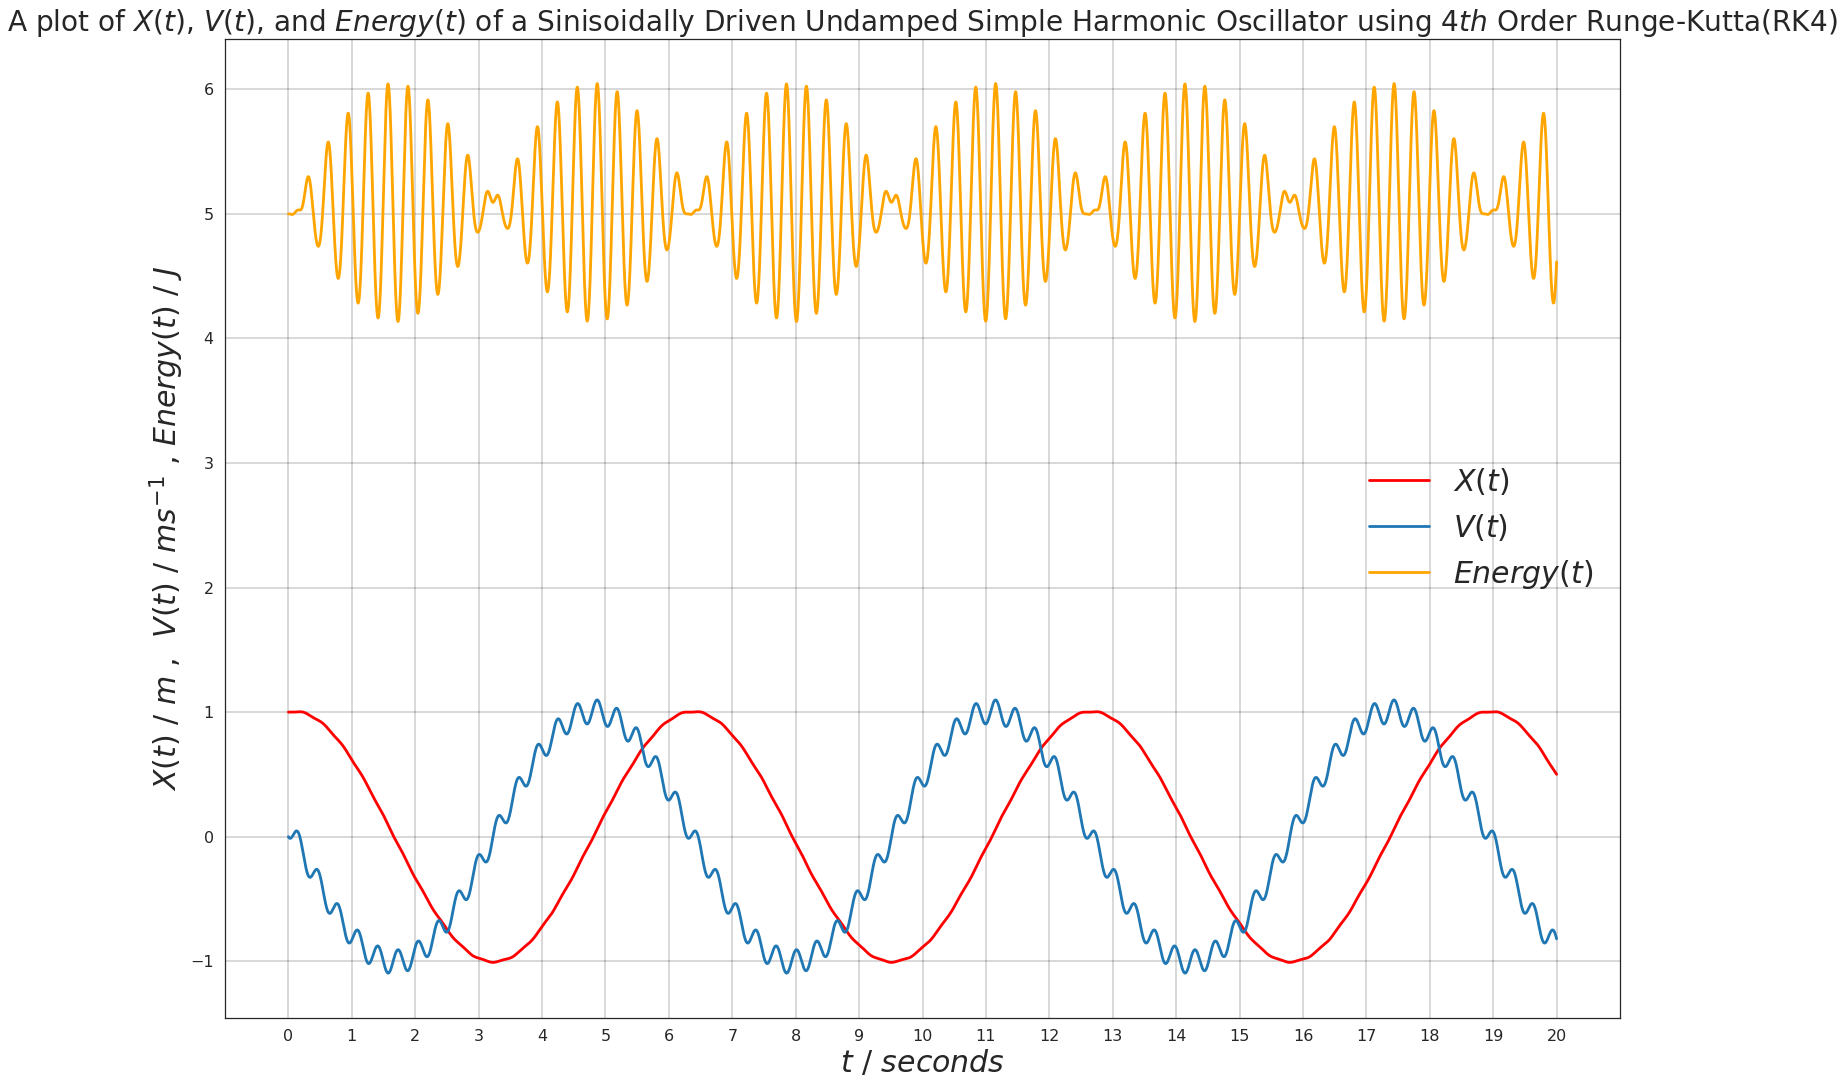

Max=  6.0455421869946155
Min=  4.135860970028885


In [10]:
driven_and_damped_harmonic_oscillator = Oscillator(10.0, 10.0, 5.0, False, 19, 20) #Oscillator(k, m, c, is_damped, F0, ω)
driven_and_damped_harmonic_oscillator.rungeKutta4()
driven_and_damped_harmonic_oscillator.display()

## van der Pol Oscillator
Now we change the class for a van der Pol Oscillator. The ODE's are $\frac{dx}{dt}$ = $y$ and  $\frac{dy}{dt}$ $=$ $μ(1-x^{2})y$ $-$ $ω_{0}^{2}x$ which stem from the overall ODE: $\frac{d^{2}x}{dt^{2}}$ $=$  $μ(1-x^{2})\frac{dx}{dt}$ $-$ $ω_{0}^{2}x$

In [41]:
#final
# -*- coding: utf-8 -*-
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# Spring Data for the Simple Harmonic Oscillator

a = 0.0
b = 20.0
N = 1000
h = (b-a)/N


class VanDerPolOscillatorOscillator:
    def __init__(self, μ, ω, ):
        # Non-linearity and Damping Strength Parameter
        self.μ = μ
        # Frequency_of_the_Oscillator
        self.ω = ω
    
        self.tpoints = np.arange(a, b, h)
        self.xpoints = []
        self.ypoints = []
        self.r = np.array([1.0, 0.0], dtype=float)
        self.epoints = []
        
    def f(self, r, t):
        x = r[0]
        y = r[1]
        fx = y
        fy = self.μ*(1 - x*x)*y - self.ω * self.ω * x
        return np.array([fx, fy], dtype=float)

    def rungeKutta4(self):
        for t in self.tpoints:
            x = self.r[0]
            y = self.r[1]
            self.xpoints.append(x)
            self.ypoints.append(y)
            
            k1 = h*self.f(self.r, t)
            k2 = h*self.f(self.r + 0.5*k1, t + 0.5*h)
            k3 = h*self.f(self.r + 0.5*k2, t + 0.5*h)
            k4 = h*self.f(self.r + k3, t + h)
            self.r += (k1 + 2*k2 + 2*k3 + k4)/6

    def display(self):
        fig = plt.figure(figsize=(25, 18))
        ax = fig.add_subplot(1, 1, 1)
        major_ticks = np.arange(-50, 50, 1)
        minor_ticks = np.arange(-50, 50, 2)
        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)
        plt.grid(color='black', linestyle='-', linewidth=0.3)

        plt.plot(self.xpoints, self.ypoints, "r", label="Phase Space Plot")

        

        plt.legend(fontsize = "25")
        plt.title("A Phase Space plot a van der Pol Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
            
        plt.xlabel("$X(t)$ / $m$", fontsize=30)
        plt.ylabel( "$Y(t)$ / $ms^{-1}$", fontsize=30 )
        plt.show()
        
        


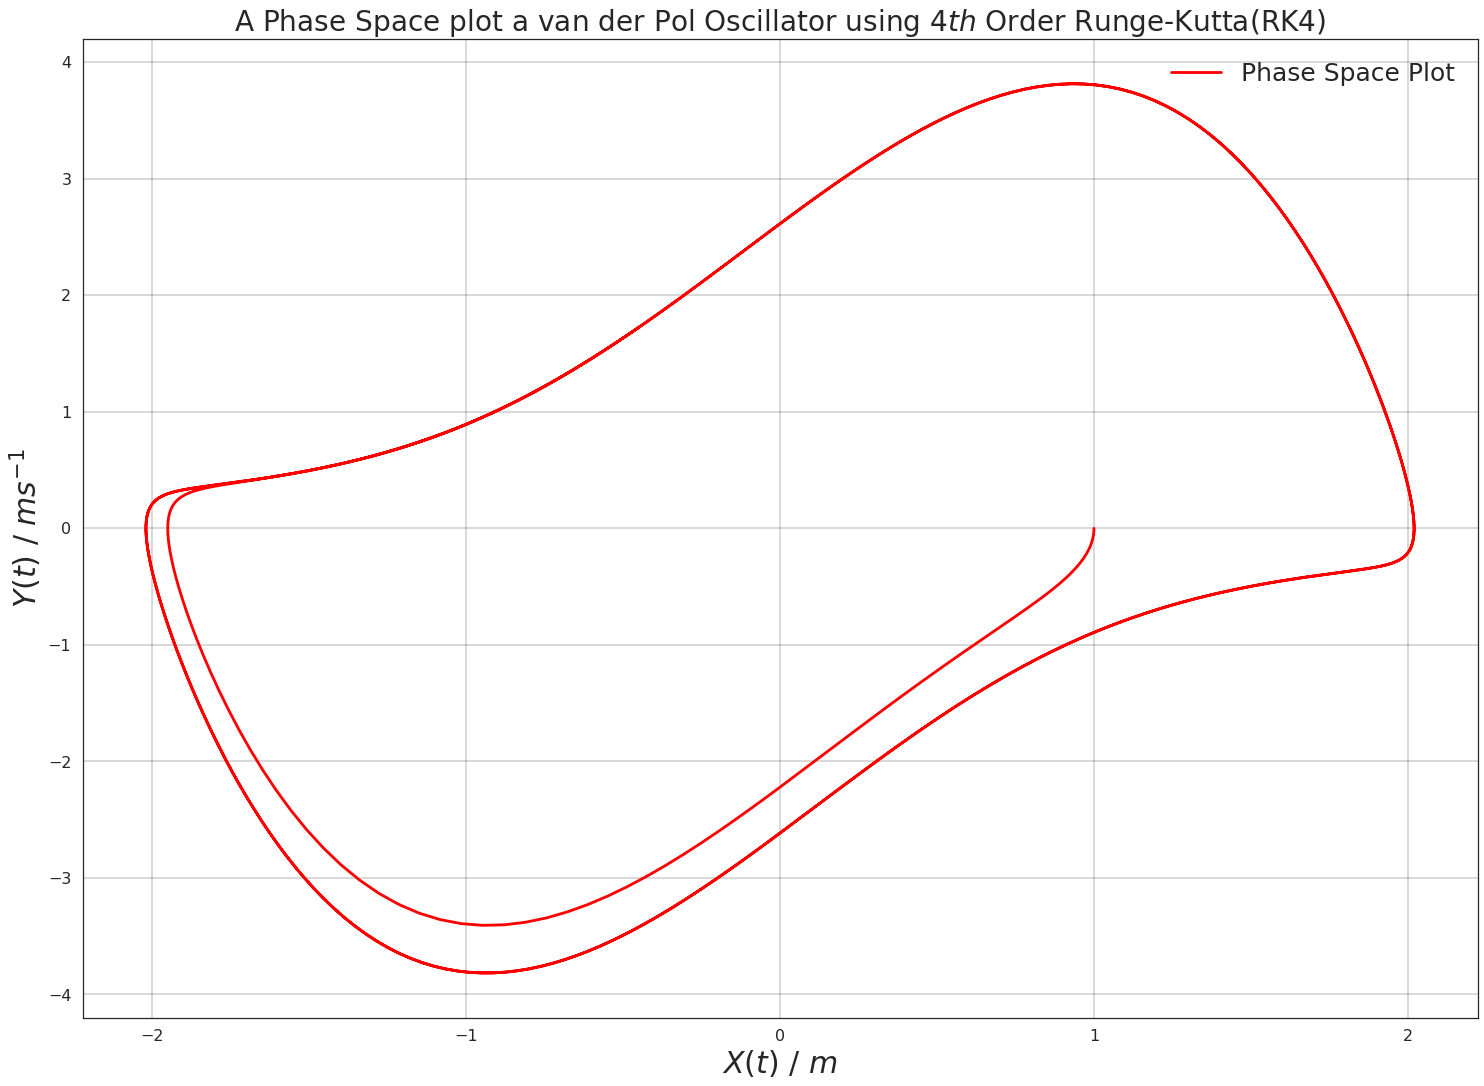

In [42]:
van_der_Pol = VanDerPolOscillatorOscillator(2.0, 1.0) #(μ, ω)
van_der_Pol.rungeKutta4()
van_der_Pol.display()


## Anharmonic Oscillator
Anharmonic Oscillator: $\frac{d^{2}x}{dt^{2}}$ = -$ω_{0}^{2}x^{3}$ breaks down into $\frac{dy}{dt}$ = -$ω_{0}^{2}x^{3}$ and $\frac{dx}{dt}$ = $y$

In [43]:
#final
# -*- coding: utf-8 -*-
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# interval and step data

a = 0.0
b = 20.0
N = 1000
h = (b-a)/N


class AnHarmonicOscillator:
    def __init__(self, ω):
        # Frequency_of_the_Oscillator
        self.ω = ω
    
        self.tpoints = np.arange(a, b, h)
        self.xpoints = []
        self.ypoints = []
        self.r = np.array([1.0, 0.0], dtype=float)
        self.epoints = []
        
    def f(self, r, t):
        x = r[0]
        y = r[1]
        fx = y
        fy =  -self.ω * self.ω * x *x * x
        return np.array([fx, fy], dtype=float)

    def rungeKutta4(self):
        for t in self.tpoints:
            x = self.r[0]
            y = self.r[1]
            self.xpoints.append(x)
            self.ypoints.append(y)
            
            k1 = h*self.f(self.r, t)
            k2 = h*self.f(self.r + 0.5*k1, t + 0.5*h)
            k3 = h*self.f(self.r + 0.5*k2, t + 0.5*h)
            k4 = h*self.f(self.r + k3, t + h)
            self.r += (k1 + 2*k2 + 2*k3 + k4)/6

    def display(self):
        fig = plt.figure(figsize=(25, 18))
        ax = fig.add_subplot(1, 1, 1)
        major_ticks = np.arange(-50, 50, 1)
        minor_ticks = np.arange(-50, 50, 2)
        ax.set_xticks(major_ticks)
        ax.set_xticks(minor_ticks, minor=True)
        ax.set_yticks(major_ticks)
        ax.set_yticks(minor_ticks, minor=True)
        plt.grid(color='black', linestyle='-', linewidth=0.3)

        plt.plot(self.xpoints, self.ypoints, "g", label="Phase Space Plot")

        

        plt.legend(fontsize = "25")
        plt.title("A Phase Space plot an Anharmonic Oscillator using $4th$ Order Runge-Kutta(RK4)", loc='center', fontsize=28)
            
        plt.xlabel("$X(t)$ / $m$", fontsize=30)
        plt.ylabel( "$Y(t)$ / $ms^{-1}$", fontsize=30 )
        plt.show()
        
        


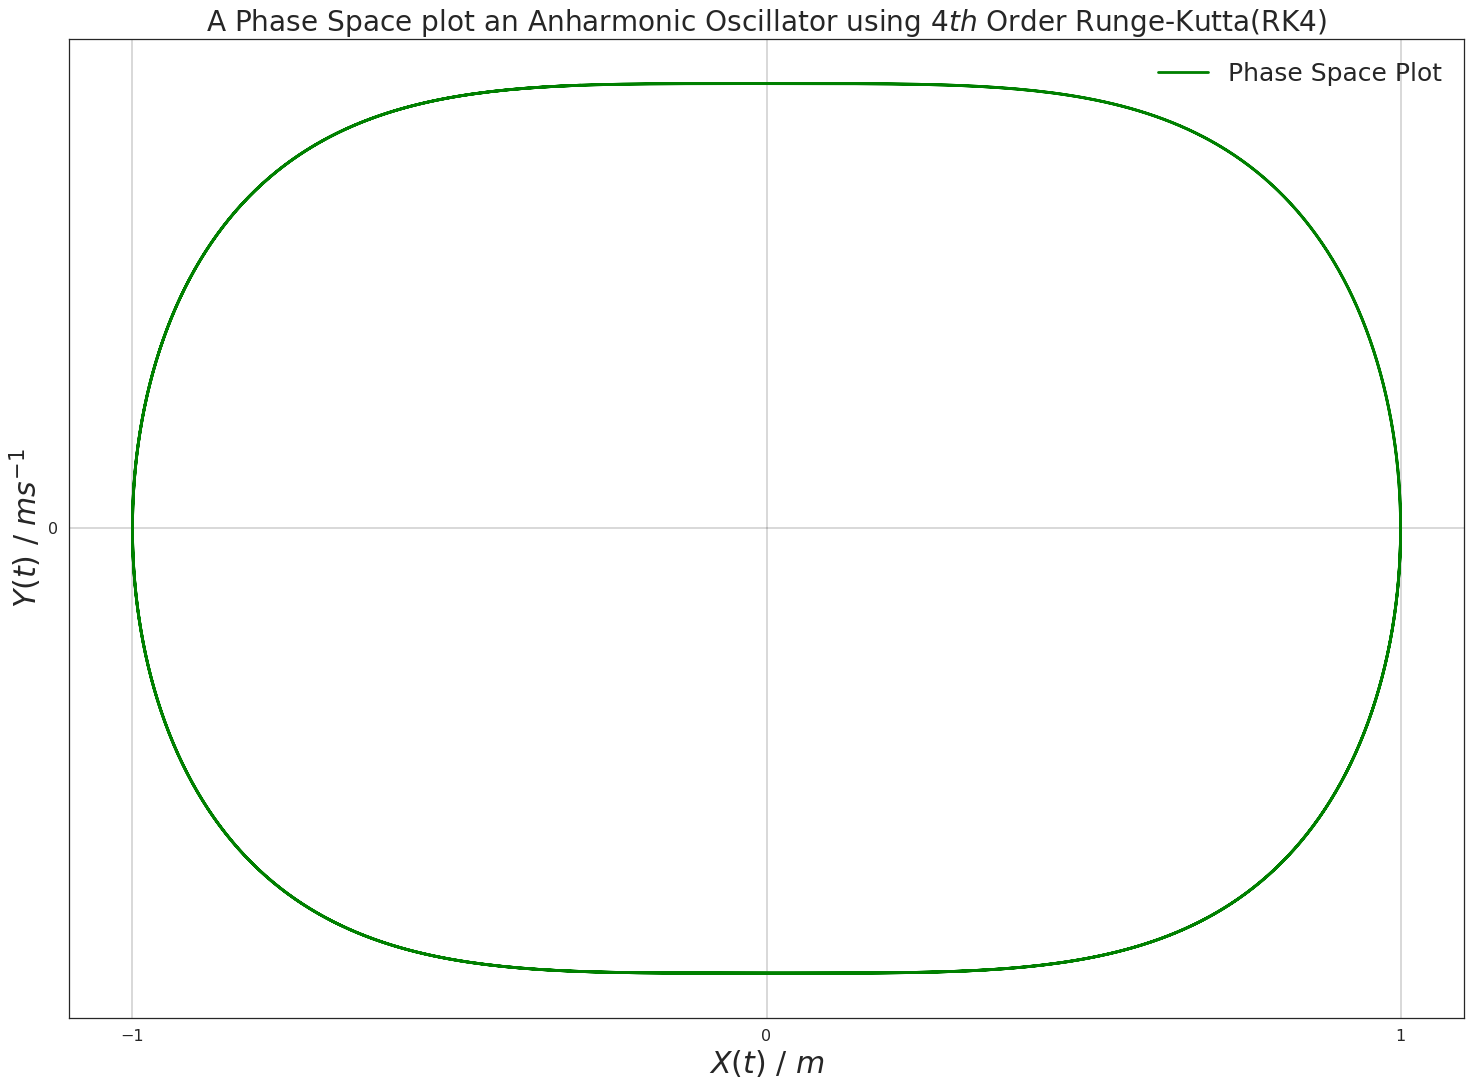

In [44]:
anharmonic = AnHarmonicOscillator(1.0) #( ω)
anharmonic.rungeKutta4()
anharmonic.display()